In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb=pd.read_csv("https://raw.githubusercontent.com/kailikia/data-science-python/master/IMDB_Data.csv", index_col="Rank")

In [3]:
imdb.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


## DATA WRANGLING
### Get rid of the space and the paranthensis and change the column names to lower case

In [5]:
imdb.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [12]:
imdb.columns=["title","genre","description","directors","actors","year","runtime_in_minutes",
              "rating","votes","revenue_in_millions","metascore"]
imdb.head()

,title,genre,description,directors,actors,year,runtime_in_minutes,rating,votes,revenue_in_millions,metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Dealing with null values
#### If less than 30% is filled in, there is an option to drop the column.
### If more than 60% replace the missing values with an appropriate measure of central tendency. In our case we will fill the nulls with mean

In [15]:
revenuemean=np.nanmean(imdb['revenue_in_millions'])
revenuemean


82.95637614678898

In [16]:
imdb["revenue_in_millions"].fillna(revenuemean,inplace=True)

In [17]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
title                  1000 non-null object
genre                  1000 non-null object
description            1000 non-null object
directors              1000 non-null object
actors                 1000 non-null object
year                   1000 non-null int64
runtime_in_minutes     1000 non-null int64
rating                 1000 non-null float64
votes                  1000 non-null int64
revenue_in_millions    1000 non-null float64
metascore              936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [19]:
#filling for the metascore
imdb["metascore"].fillna(np.nanmean(imdb['metascore']),inplace=True)

In [20]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
title                  1000 non-null object
genre                  1000 non-null object
description            1000 non-null object
directors              1000 non-null object
actors                 1000 non-null object
year                   1000 non-null int64
runtime_in_minutes     1000 non-null int64
rating                 1000 non-null float64
votes                  1000 non-null int64
revenue_in_millions    1000 non-null float64
metascore              1000 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [21]:
#Correlation command(corr())
imdb.corr()

,year,runtime_in_minutes,rating,votes,revenue_in_millions,metascore
year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
runtime_in_minutes,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
revenue_in_millions,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
metascore,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


In [22]:
#Description of the correlation scores
#type of the correlation and then specify
#Weak correlation(0.1 - 0.3)
#medium correlation(more than 0.3 - less than 0.5)
#strong correlation(more than or equal to 0.5 - 1.0)

## EDA step
### Draw a bar graph showing the top 10 highest revenue movies

In [ ]:
#Sort the dataframe in descending order 
#then slice the dataframe by picking the first ten records
#plot the bar graph

In [27]:
top10=imdb.nlargest(10,'revenue_in_millions')

In [43]:
top10df=top10[['revenue_in_millions','title']]
top10df.head()

,revenue_in_millions,title
Rank,,
51,936.63,Star Wars: Episode VII - The Force Awakens
88,760.51,Avatar
86,652.18,Jurassic World
77,623.28,The Avengers
55,533.32,The Dark Knight


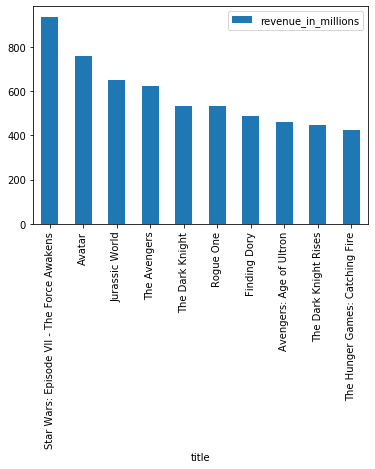

In [48]:
#Plot bar graph using matplotlib
top10df.index=top10df.title
top10df[['title','revenue_in_millions']].plot.bar()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

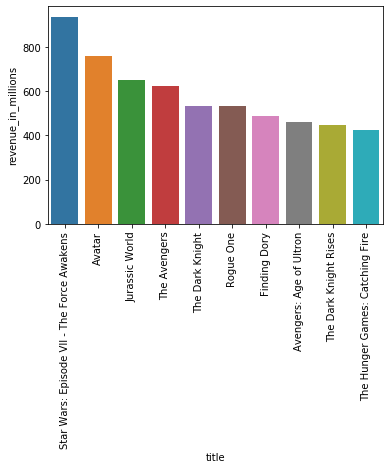

In [35]:
#plot a bar graph of revenue_in_millions and title
sns.barplot(data=top10df, x = 'title', y='revenue_in_millions')
plt.xticks(rotation=90) 
plt

### Plotting a pie chart for the top 10 directors

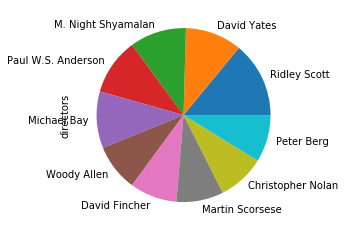

In [51]:
#pie chart for top 10 directors
imdb.directors.value_counts()[:10].plot.pie()

## Model building process

### Linear regression model
#### Simple and multiple linear regression models

#### In our project we will try to predict the revenue of a movie.

In [52]:
#### In a regression problem we have 
##the dependent variable(y=='revenue_in_millioons')
#and the independent variable.

In [53]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
title                  1000 non-null object
genre                  1000 non-null object
description            1000 non-null object
directors              1000 non-null object
actors                 1000 non-null object
year                   1000 non-null int64
runtime_in_minutes     1000 non-null int64
rating                 1000 non-null float64
votes                  1000 non-null int64
revenue_in_millions    1000 non-null float64
metascore              1000 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


## Simple linear regression
### dependent variable==revenue_in_millions
### Independent variable==metascore

## Multiple regression Regression
### dependent variable==revenue_in_millions
### Independent variable==metascore,rating,votes


In [54]:
#Importing the necessary libraries for this step
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### Simple linear regression

In [60]:
x=imdb[['metascore']]
y=imdb[['revenue_in_millions']].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
#Fitting the simple linear model
sim_ln_reg=LinearRegression()
sim_ln_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#Test the simple linear model
#Regression model evaluation metric-> RMSE
#Using the model to predict the revenue_in_millions(y-hat)
#The y-hat name it as sm_ln_reg_pred
sim_ln_reg_pred=sim_ln_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,sim_ln_reg_pred)
#Now we calculate the actual rmse
print(f'Test Rmse: {np.sqrt(test_rmse)}')

Test Rmse: 96.16615050867371


In [65]:
#Always remember to normalize your 
#data before training the model.

## Multiple linear regression

In [66]:
x=imdb[['metascore','rating','votes']]
y=imdb[['revenue_in_millions']].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
#Train our multiple linear model 
mult_reg=LinearRegression()
mult_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
#Predicting using the model
mult_reg_pred=mult_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,mult_reg_pred)
print(f' Test rmese for multiple regression : {np.sqrt(test_rmse)}')

 Test rmese for multiple regression : 68.37085802624303
